importing the libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

importing the dataset

In [37]:
df = pd.read_csv("Articles.csv", encoding='latin-1')
df['text'] = df['Heading'].astype(str) + " " + df['Article'].astype(str)
df = df[df['NewsType'].isin(['business', 'sports'])]
df['label'] = df['NewsType'].map({'business': 0, 'sports': 1})



converting text to numerical representation

In [38]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=20000, min_df=1)
X = vectorizer.fit_transform(df['text'])

encoding the labels

In [39]:
y = df['label']

splitting into training and test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training the svm classifier

In [41]:
clf = OneVsRestClassifier(svm.SVC(kernel='linear', gamma='scale', C=1.0 , probability=True))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

making the predictions

In [42]:
predictions = clf.predict(X_test)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 0 1 0 1 1 

making the classification report

In [43]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score     support
0              1.000000  0.996183  0.998088  262.000000
1              0.996403  1.000000  0.998198  277.000000
accuracy       0.998145  0.998145  0.998145    0.998145
macro avg      0.998201  0.998092  0.998143  539.000000
weighted avg   0.998151  0.998145  0.998145  539.000000


classification heatmap

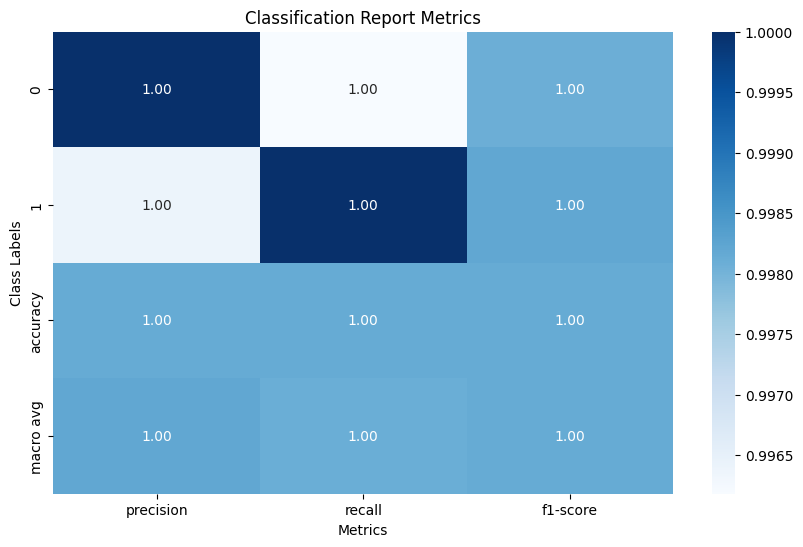

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class Labels")
plt.show()

precision per class

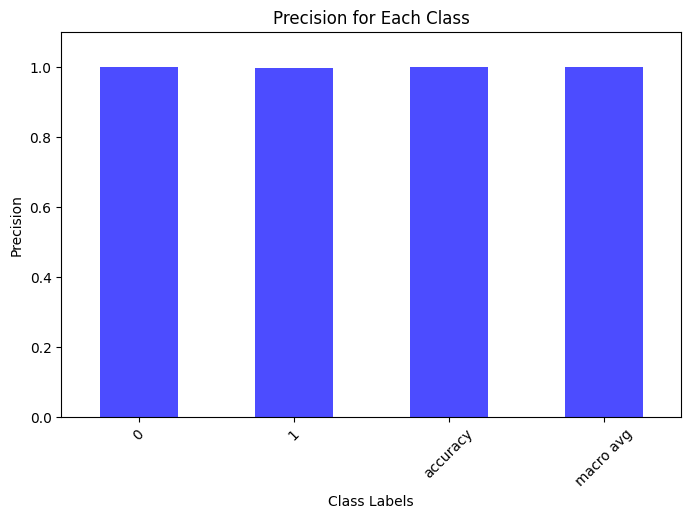

In [45]:
plt.figure(figsize=(8, 5))
df_report.iloc[:-1, 0].plot(kind='bar', color='blue', alpha=0.7)
plt.title("Precision for Each Class")
plt.xlabel("Class Labels")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.show()

recall per class

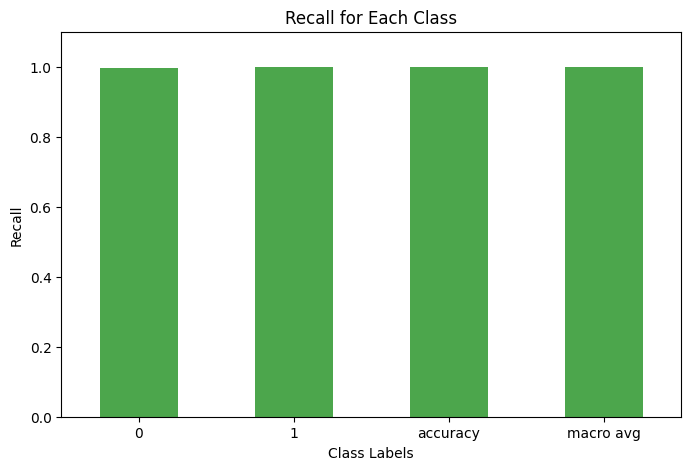

In [46]:
plt.figure(figsize=(8, 5))
df_report.iloc[:-1, 1].plot(kind='bar', color='green', alpha=0.7)
plt.title("Recall for Each Class")
plt.xlabel("Class Labels")
plt.ylabel("Recall")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.show()

f1 per class

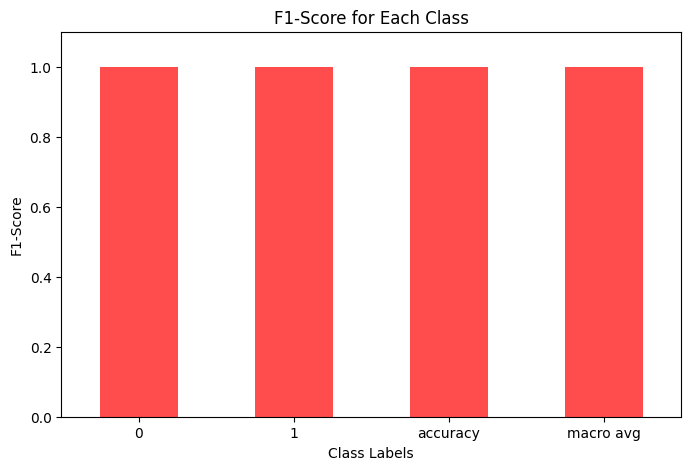

In [47]:
plt.figure(figsize=(8, 5))
df_report.iloc[:-1, 2].plot(kind='bar', color='red', alpha=0.7)
plt.title("F1-Score for Each Class")
plt.xlabel("Class Labels")
plt.ylabel("F1-Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.show()

classification heatmap

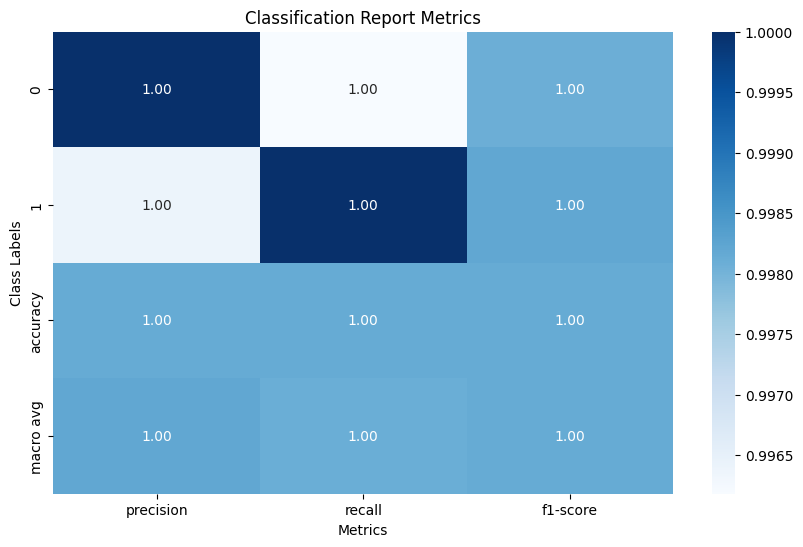

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class Labels")
plt.show()

new instances

In [49]:
new_articles = [
    "Global Markets Plunge Amid Economic Uncertainty",
    "Local Team Clinches National Championship in Overtime Thriller",
    "Tech Giant Reports Record Profits for Q4 Amid Strong Demand",
    "Star Forward Transfers to Rival Club in Landmark Deal",
    "Bitcoin Prices Surge Following Institutional Investments"
]

converting instances to classification dataframes

In [50]:
X_new = vectorizer.transform(new_articles)
predicted_classes = clf.predict(X_new)

prediction labels

In [51]:
category_map = {0: 'Business', 1: 'Sports'}
results = [category_map[pred] for pred in predicted_classes]

predictions

In [52]:
for i, (article, category) in enumerate(zip(new_articles, results), 1):
    print(f"Question {i}:\nHeadline: {article}\nPredicted Category: {category}\n")

Question 1:
Headline: Global Markets Plunge Amid Economic Uncertainty
Predicted Category: Business

Question 2:
Headline: Local Team Clinches National Championship in Overtime Thriller
Predicted Category: Sports

Question 3:
Headline: Tech Giant Reports Record Profits for Q4 Amid Strong Demand
Predicted Category: Business

Question 4:
Headline: Star Forward Transfers to Rival Club in Landmark Deal
Predicted Category: Sports

Question 5:
Headline: Bitcoin Prices Surge Following Institutional Investments
Predicted Category: Business



visualizing the instances

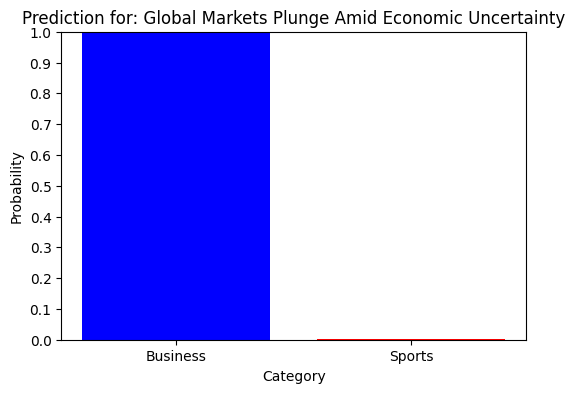

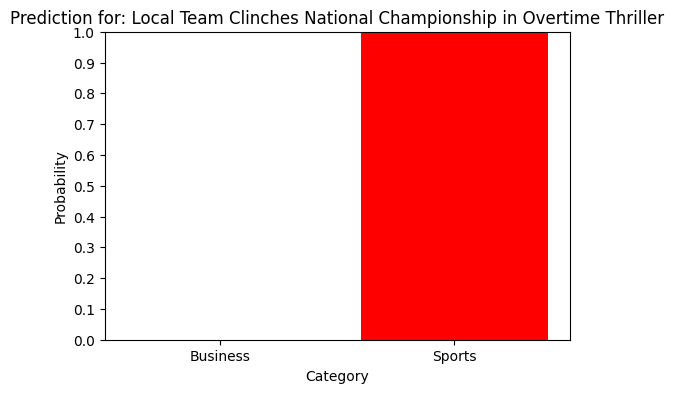

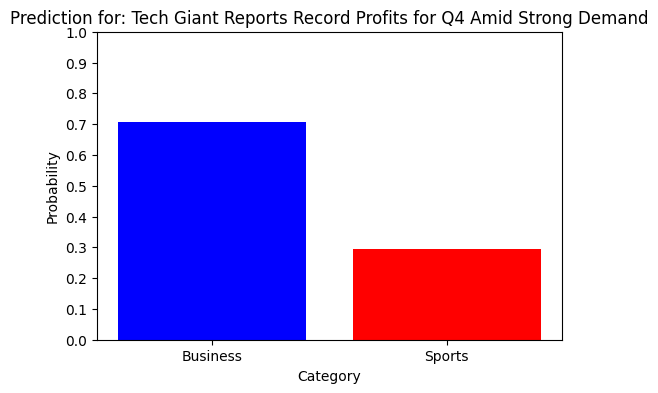

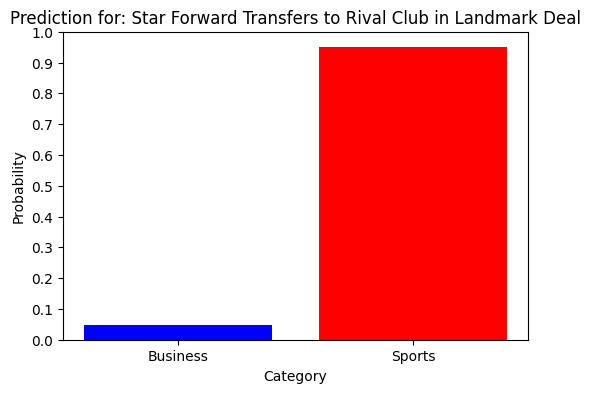

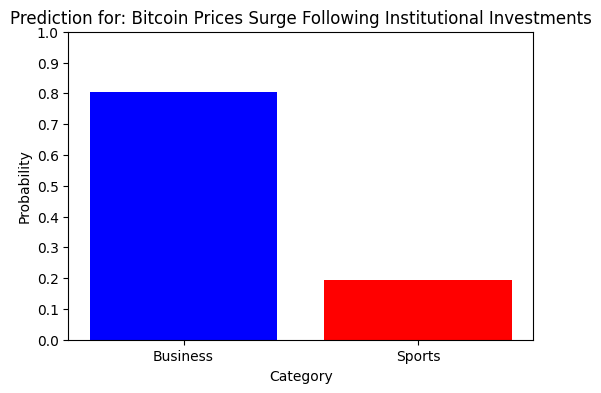

In [35]:
for i, article in enumerate(new_articles):
    X_article = vectorizer.transform([article])
    prediction = clf.predict(X_article)[0]
    plt.figure(figsize=(6, 4))
    plt.bar(["Business", "Sports"], clf.predict_proba(X_article)[0], color=['blue', 'red'])
    plt.title(f"Prediction for: {article}")
    plt.xlabel("Category")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis interval to 0.1
    plt.show()